In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
from fastcore.xtras import load_pickle

import matplotx
import numpy as np
import pandas as pd

from gptchem.plotsettings import *

%matplotlib inline

In [3]:
all_res = glob("out/**/*.pkl")

In [4]:
compiled_res = []
compiled_gpr = []

for res in all_res:
    loaded = load_pickle(res)
    repre = loaded["representation"]
    num_points = loaded["num_train_points"]

    metrics = {
        "representation": loaded["representation"],
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["mean_absolute_error"],
        "max_error": loaded["max_error"],
        "mse": loaded["mean_squared_error"],
    }

    compiled_res.append(metrics)

    gpr_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["gpr_baseline"]["mean_absolute_error"],
        "max_error": loaded["gpr_baseline"]["max_error"],
        "mse": loaded["gpr_baseline"]["mean_squared_error"],
    }

    compiled_gpr.append(gpr_metrics)

In [5]:
compiled_res = pd.DataFrame(compiled_res)
compiled_gpr = pd.DataFrame(compiled_gpr)

In [6]:
compiled_grouped_res = compiled_res.groupby(["representation", "num_train_points"]).agg(
    ["mean", "std", "count"]
)

In [7]:
compiled_gpr_grouped = compiled_gpr.groupby(["num_train_points"]).agg(["mean", "std"])

In [8]:
compiled_grouped_res

mae                   max_error  \
                                     mean       std count        mean   
representation num_train_points                                         
InChI          10                0.676240       NaN     1    3.520000   
SELFIES        10                0.824770  0.209767     4    3.185000   
               20                0.768267  0.079081     3    3.320000   
               50                0.686653  0.040485     3    3.100000   
               100               0.650640  0.033231     3    3.636667   
               200               0.629980  0.008061     2    3.900000   
               1000              0.501720  0.043049     2    1.900000   
               5000              0.377120       NaN     1    1.380000   
SMILES         10                1.387787  1.391065     6  147.788333   
               20                0.752096  0.060821     5    3.430000   
               50                0.679377  0.054183     7    3.151429   
               100               0.646864  0.015779     5    3.234000   
               200               0.593500  0.006511     4    2.645000   
               1000              0.472880  0.042233     4    2.332500   
               5000              0.460650  0.197381     4   26.215000   

                                                          mse               \
                                        std count        mean          std   
representation num_train_points                                              
InChI          10                       NaN     1    0.736266          NaN   
SELFIES        10                  0.310000     4    1.078488     0.499402   
               20                  0.744782     3    0.918837     0.138539   
               50                  0.659621     3    0.778944     0.107259   
               100                 0.500833     3    0.716050     0.090726   
               200                 0.947523     2    0.673287     0.031602   
               1000                0.254558     2    0.394306     0.071273   
               5000                     NaN     1    0.239338          NaN   
SMILES         10                353.339862     6  504.559369  1233.186912   
               20                  0.550681     5    0.946053     0.151064   
               50                  0.829306     7    0.764131     0.110091   
               100                 0.203544     5    0.688629     0.039471   
               200                 0.487340     4    0.560064     0.028697   
               1000                0.609446     4    0.383231     0.083849   
               5000               49.397411     4   10.278554    20.121321   

                                       
                                count  
representation num_train_points        
InChI          10                   1  
SELFIES        10                   4  
               20                   3  
               50                   3  
               100                  3  
               200                  2  
               1000                 2  
               5000                 1  
SMILES         10                   6  
               20                   5  
               50                   7  
               100                  5  
               200                  4  
               1000                 4  
               5000                 4

/Users/kevinmaikjablonka/git/kjappelbaum/plotutils/plotutils.py:11: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(x_min - pad * (x_max - x_min), x_max + pad * (x_max - x_min))


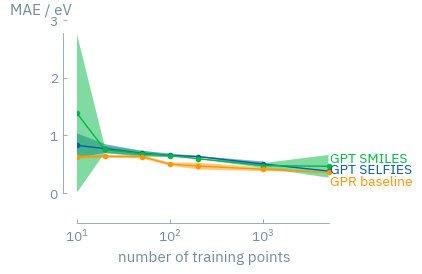

In [12]:

fig, ax = plt.subplots(1, 1)
ax.plot(
    compiled_grouped_res.loc["SELFIES", :].index,
    compiled_grouped_res.loc["SELFIES", :]["mae"]["mean"],
    label="GPT SELFIES",
    marker="o",
)

ax.fill_between(
    compiled_grouped_res.loc["SELFIES", :].index,
    compiled_grouped_res.loc["SELFIES", :]["mae"]["mean"]
    - compiled_grouped_res.loc["SELFIES", :]["mae"]["std"],
    compiled_grouped_res.loc["SELFIES", :]["mae"]["mean"]
    + compiled_grouped_res.loc["SELFIES", :]["mae"]["std"],
    alpha=0.5,
)

ax.plot(
    compiled_grouped_res.loc["SMILES", :].index,
    compiled_grouped_res.loc["SMILES", :]["mae"]["mean"],
    label="GPT SMILES",
    marker="o",
)

ax.fill_between(
    compiled_grouped_res.loc["SMILES", :].index,
    compiled_grouped_res.loc["SMILES", :]["mae"]["mean"]
    - compiled_grouped_res.loc["SMILES", :]["mae"]["std"],
    compiled_grouped_res.loc["SMILES", :]["mae"]["mean"]
    + compiled_grouped_res.loc["SMILES", :]["mae"]["std"],
    alpha=0.5,
)

ax.plot(
    compiled_gpr_grouped.loc[:].index,
    compiled_gpr_grouped["mae"]["mean"],
    label="GPR baseline",
    marker="o",
)

ax.fill_between(
    compiled_gpr_grouped.loc[:].index,
    compiled_gpr_grouped.loc[:]["mae"]["mean"] - compiled_gpr_grouped.loc[:]["mae"]["std"],
    compiled_gpr_grouped.loc[:]["mae"]["mean"] + compiled_gpr_grouped.loc[:]["mae"]["std"],
    alpha=0.5,
)

matplotx.line_labels()

ax.set_xlabel("number of training points", labelpad=4)
matplotx.ylabel_top("MAE / eV")
ax.set_xscale("log")

range_frame(
    ax,
    compiled_gpr_grouped.loc[:].index,
    np.stack(
        [ compiled_grouped_res.loc["SMILES", :]["mae"]["mean"]
    + compiled_grouped_res.loc["SMILES", :]["mae"]["std"],
     compiled_grouped_res.loc["SMILES", :]["mae"]["mean"]
    - compiled_grouped_res.loc["SMILES", :]["mae"]["std"],
    ]
    ).flatten()
)
fig.savefig("bandgap_regression_res.pdf", bbox_inches="tight")